# Part 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], 
              [4, 2], [4, 4], [4, 0]])
print(X)

[[1 2]
 [1 4]
 [1 0]
 [4 2]
 [4 4]
 [4 0]]


In [3]:
Y = pd.DataFrame(X,columns=["A","B"])
print(Y)

   A  B
0  1  2
1  1  4
2  1  0
3  4  2
4  4  4
5  4  0


In [4]:
kmeans = KMeans(n_clusters=2)

In [5]:
kmeans.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1])

In [7]:
kmeans.cluster_centers_

array([[1., 2.],
       [4., 2.]])

In [8]:
Y['cluster_id'] = kmeans.labels_

In [9]:
Y

,A,B,cluster_id
0,1,2,0
1,1,4,0
2,1,0,0
3,4,2,1
4,4,4,1
5,4,0,1


In [10]:
kmeans.inertia_

16.0

In [12]:
kmeans.predict([[0,0],[4,4]])

array([0, 1])

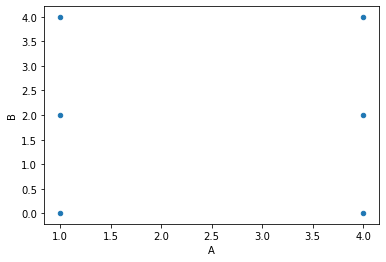

In [14]:
Y.plot(kind='scatter',x='A',y='B')

# Part -2 

In [31]:
cereal_df = pd.read_csv("Cereals.csv",index_col='name')

In [32]:
cereal_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [33]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [34]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 100%_Bran to Wheaties_Honey_Gold
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  77 non-null     int64  
 1   protein   77 non-null     int64  
 2   fat       77 non-null     int64  
 3   sodium    77 non-null     int64  
 4   fiber     77 non-null     float64
 5   carbo     76 non-null     float64
 6   sugars    76 non-null     float64
 7   potass    75 non-null     float64
 8   vitamins  77 non-null     int64  
 9   shelf     77 non-null     int64  
 10  weight    77 non-null     float64
 11  cups      77 non-null     float64
 12  rating    77 non-null     float64
dtypes: float64(7), int64(6)
memory usage: 8.4+ KB


In [37]:
cereal_df.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
imputer = SimpleImputer()

In [45]:
imputer.fit(cereal_df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [48]:
cereal_df = pd.DataFrame(imputer.transform(cereal_df),columns=cereal_df.columns,index=cereal_df.index)

In [49]:
cereal_df.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [50]:
cereal_df.head(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.00,0.33,68.402973
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.00,1.00,33.983679
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.00,0.33,59.425505
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.00,0.50,93.704912
Almond_Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,3.0,1.00,0.75,34.384843
Apple_Cinnamon_Cheerios,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.000000,25.0,1.0,1.00,0.75,29.509541
Apple_Jacks,110.0,2.0,0.0,125.0,1.0,11.0,14.0,30.000000,25.0,2.0,1.00,1.00,33.174094
Basic_4,130.0,3.0,2.0,210.0,2.0,18.0,8.0,100.000000,25.0,3.0,1.33,0.75,37.038562
Bran_Chex,90.0,2.0,1.0,200.0,4.0,15.0,6.0,125.000000,25.0,1.0,1.00,0.67,49.120253


In [52]:
cereal_df = cereal_df.drop(['cups'],axis=1)

In [53]:
cereal_df.tail(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
name,,,,,,,,,,,,
Special_K,110.0,6.0,0.0,230.0,1.0,16.0,3.0,55.0,25.0,1.0,1.0,53.131324
Strawberry_Fruit_Wheats,90.0,2.0,0.0,15.0,3.0,15.0,5.0,90.0,25.0,2.0,1.0,59.363993
Total_Corn_Flakes,110.0,2.0,1.0,200.0,0.0,21.0,3.0,35.0,100.0,3.0,1.0,38.839746
Total_Raisin_Bran,140.0,3.0,1.0,190.0,4.0,15.0,14.0,230.0,100.0,3.0,1.5,28.592785
Total_Whole_Grain,100.0,3.0,1.0,200.0,3.0,16.0,3.0,110.0,100.0,3.0,1.0,46.658844
Triples,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3.0,1.0,39.106174
Trix,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2.0,1.0,27.753301
Wheat_Chex,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1.0,1.0,49.787445
Wheaties,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1.0,1.0,51.592193
